In [1]:
from contract_v01 import VanillaOption
from sde_1d_v01 import Gbm_1d

import numpy as np
from scipy.fftpack import fft, ifft

In [1]:
def many_args(*args):
    print('len of args is '+ str(len(args)))
    print('list of args is '+ str(args))

In [4]:
many_args(1, 2, 'string')

len of args is 3
list of args is (1, 2, 'string')


In [2]:
'''===========
paras
========'''
s0 = 100 
r = .05 
sigma = .3
T = 1
K = 90
otype = 1


In [3]:
'''===============
Test bsm_price
================='''
gbm1 = Gbm_1d(init_state=s0, drift_ratio=r, vol_ratio=sigma)
option1 = VanillaOption(otype = otype, strike = K, maturity= T) 

print('>>>>>>>>>> exact call value is ' + str(gbm1.bsm_price(option1)))   


>>>>>>>>>> exact call value is 19.69744208683972


Next, we use FFT to recover the result on the page 44 of [Hir13] for the above model.

In [34]:
'''=============
FFT paras
================='''
alpha = 1
N = 2**6
eta = 0.1

In [35]:
'''============
step 1. set Phi(t), the characteristic function of the terminal stock price
================'''
Phi = lambda t: np.exp(1j*t*(np.log(s0)+(r-sigma**2/2)*T)-.5*sigma**2*T*t**2)

In [36]:
lamda = 2*np.pi/N/eta
nu = np.arange(N)*eta
c = np.exp(-r*T)
beta = np.log(K) - lamda*N/2
k_arr = np.arange(N)*lamda + beta

In [37]:
np.exp(k_arr[int(N/2)])
#np.exp(beta)


90.0

In [38]:
x = []
for k in range(N):
    x.append(eta*c/(alpha+1j*nu[k])/(alpha+1j*nu[k]+1)*np.exp(-1j*beta*nu[k])*Phi(nu[k]- (alpha+1)*1j))
x[0] = x[0]/2

In [39]:
y = fft(x)

In [40]:
call_fft = [np.exp(-alpha*k_arr[k])*y[k].real for k in range(N)]

In [41]:
call_fft[int(N/2)]

61.45964269696038

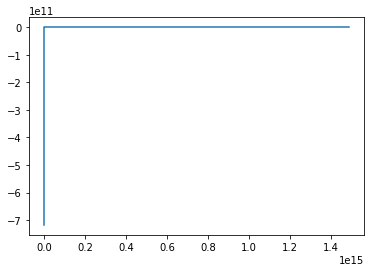

In [42]:
import matplotlib.pyplot as plt
plt.plot(np.exp(k_arr), call_fft)

In [12]:
'''============
step 2. determine characteristic function of the modified call
=============='''
c = np.exp(-r*T)
Psi = lambda nu: c/(alpha + nu*1j)/(alpha + 1j*nu+1)*Phi(nu-(alpha+1)*1j)

In [13]:
'''=========
step 3. set other parameters
============'''
lamda = 2*np.pi/N/eta
beta = np.log(s0) - lamda*N/2
k_arr = np.arange(N)*lamda + beta

In [14]:
'''=============
step 4. set discrete points for fft 
==============='''
nu = np.arange(N)*eta
w = 2*np.ones(N); w[0] = 1; w = w*eta/2
x = [np.exp(-1j*beta*nu[j])*Psi(nu[j])*w[j] for j in np.arange(N)]

In [15]:
call_fft = ifft(x)

In [16]:
np.exp(k_arr[int(N/2)])

100.00000000000023

In [17]:
call_fft[int(N/2)].real

17.464377143366253

In [18]:
tmp = np.zeros(5)
tmp[0]

0.0

In [19]:
x

[(287.56844971430695+0j),
 (-566.406824350614+74.69988401253036j),
 (541.3238265905201-144.04101908237135j),
 (-502.89774446041395+203.69551862577205j),
 (455.25693977772835-251.01947795797815j),
 (-402.73708510672895+285.1688952484239j),
 (349.16001871686535-306.77879254065283j),
 (-297.44655955919524+317.4389918459206j),
 (249.53679506307955-319.1793900636172j),
 (-206.50742893119997+314.0812956307978j),
 (168.77298554215585-304.04052216260993j),
 (-136.293221577975+290.65654518782605j),
 (108.74796706283419-275.2064676017106j),
 (-85.66787196570671+258.66676569869423j),
 (66.52395723200925-241.7565399582266j),
 (-50.784350069043114+224.9863202710371j),
 (37.94724174508589-208.7040507110537j),
 (-27.55774429202478+193.1346577696279j),
 (19.21445178669668-178.41228920197355j),
 (-12.569795472858676+164.60564320165048j),
 (7.326929835405321-151.73735452700163j),
 (-3.234905370316153+139.79853392857862j),
 (0.08320779901439437-128.7594884378397j),
 (2.3037047978032548+118.57750321180703